In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import keras 
from keras.models import Model
from keras import backend as k
from keras.layers import Flatten,Conv2D,Dense,Dropout,MaxPooling2D

In [ ]:
import tensorflow
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# check size of training and testing data
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

x_train :  (60000, 28, 28)
x_test :  (10000, 28, 28)
y_train :  (60000,)
y_test :  (10000,)


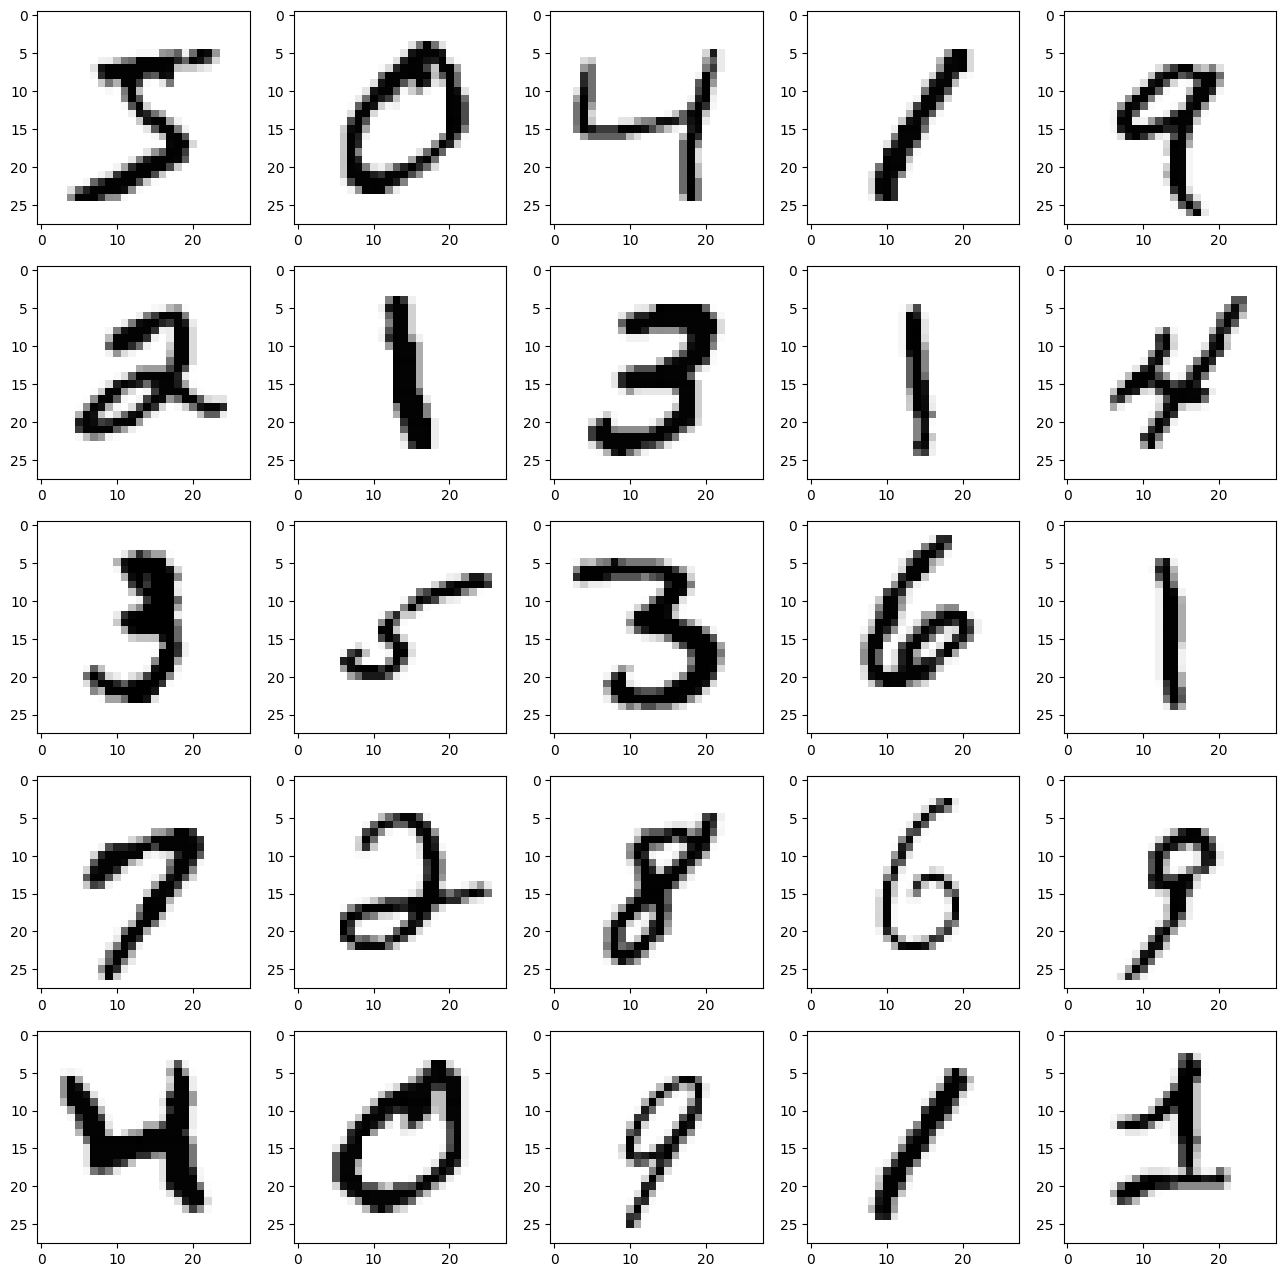

In [ ]:
# show soome image 
plt.figure(figsize=(16,16))
j=1
for i in range(25):
  plt.subplot(5,5,j)
  j=j+1
  plt.imshow(x_train[i],cmap='Greys')
  
plt.show()

In [ ]:
#print("Dimension ",x_train.ndims)
print("Shape ",x_train.shape)

Shape  (60000, 28, 28)


In [ ]:
# reshape dataset to have a single channel 
img_rows,img_cols=28,28
x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
x_test.shape

(10000, 1, 28, 28)

In [ ]:
print("x_train type ",type(x_train))
print(x_train[0])

x_train type  <class 'numpy.ndarray'>
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126
   136 175  26 166 255 247 127   0   0   0   0]
  [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253
   253 225 172 253 242 195  64   0   0   0   0]
  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253
   251  93  82  82  56  39   0   0   0   0   0]
  [  0   0

In [ ]:
# convert from integer to float 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print(x_train[0])

[[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
     0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
    18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
  [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
   253. 253. 253. 253. 225. 172. 253. 242. 19

In [ ]:
# data normalization 
x_train = x_train/255
x_test = x_test/255
x_train[0].round(2)


array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  ,

In [ ]:
# convert class vector to binary class matrics or one hot encoding target values 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:

# create the conv layer 
model = keras.Sequential()
# add input layer
model.add(Conv2D(32,3,activation='relu',input_shape=(28,28,1)))
# add first hidden layer with maxpooling
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

# to prevent overfiting add dropout layer 
model.add(Dropout(0.5))

# to create 1d array for fully connected layer add flatten layer 
model.add(Flatten())


#add fully connected layer 
model.add(Dense(250,activation='sigmoid'))

# add the output layer here we will precdict 10 number so the units will be 10 
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 250)               1024250   
                                                        

In [ ]:
# compilaton process of the model 
model.compile(optimizer=tensorflow.keras.optimizers.Adadelta(),
              loss = keras.losses.categorical_crossentropy,
              metrics=['Accuracy'])

In [ ]:
# x_train = np.expand_dims(x_train,-1)
# x_test = np.expand_dims(x_test,-1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
model.fit(x_train,
          y_train,
          validation_data=(x_test,y_test),
          epochs=15,
          batch_size=50,
          verbose=1)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/15
1200/1200 [==============================] - 72s 51ms/step - loss: 2.5197 - Accuracy: 0.0992 - val_loss: 2.4388 - val_Accuracy: 0.1009
Epoch 2/15
1200/1200 [==============================] - 56s 47ms/step - loss: 2.3845 - Accuracy: 0.1087 - val_loss: 2.3227 - val_Accuracy: 0.1417
Epoch 3/15
1200/1200 [==============================] - 57s 47ms/step - loss: 2.2840 - Accuracy: 0.1846 - val_loss: 2.2383 - val_Accuracy: 0.3136
Epoch 4/15
1200/1200 [==============================] - 59s 49ms/step - loss: 2.2101 - Accuracy: 0.3507 - val_loss: 2.1724 - val_Accuracy: 0.4968
Epoch 5/15
1200/1200 [==============================] - 59s 49ms/step - loss: 2.1466 - Accuracy: 0.4699 - val_loss: 2.1065 - val_Accuracy: 0.5641
Epoch 6/15
1200/1200 [==============================] - 60s 50ms/step - loss: 2.0762 - Accuracy: 0.5241 - val_loss: 2.0258 - val_Accuracy: 0.5942
Epoch 7/15
1200/1200 [==============================] - 59s 49ms/step - loss: 1.9868 - Accuracy: 0.5771 - val_loss: 1.9208 -

In [ ]:
score = model.evaluate(x_test,y_test)
print("Accuracy ",score[1])

313/313 [==============================] - 5s 15ms/step - loss: 0.8017 - Accuracy: 0.8078
Accuracy  0.8077999949455261


In [ ]:
# single value prediction in number 
prediction = model.predict(x_test)
print("Higest score",(prediction[3]))
print("Higest index",np.argmax(prediction[3]))

 15/313 [>.............................] - ETA: 2s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 [==============================] - 2s 7ms/step
Higest score [0.64897084 0.00138677 0.04450542 0.05010205 0.01196572 0.03457052
 0.13156787 0.02435714 0.02981531 0.0227584 ]
Higest index 0


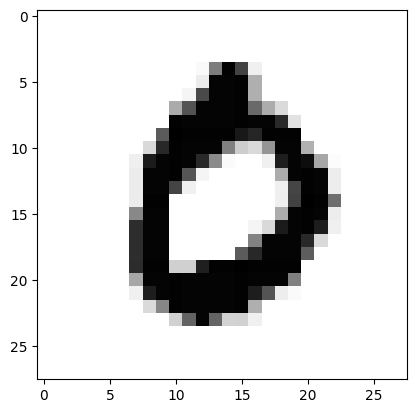

In [ ]:
plt.imshow(x_test[3].reshape(28,28),cmap='Greys')
plt.show()

In [ ]:
# Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# prediction = (prediction > 0.5) #greater than 0.50 on scale 0 to 1
# print(prediction)
# cm = confusion_matrix(y_test, prediction)

# sns.heatmap(cm,annot=True)
# plt.savefig('h.png')


[[False False False ...  True False False]
 [False False  True ... False False False]
 [False  True False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


ValueError: ignored